---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 1

---

Please write your full name here
- **Name** : Habiba Mohsen Ateya


- **Make sure to answer ALL questions**
- **Leave the output of the cells, don't remove it**

## Introduction to Machine Learning
For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [46]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [47]:
def answer_zero():
  features=cancer.feature_names
  no_features=features.shape[0]
  return no_features

In [48]:
print(answer_zero())

30


### Question 1
Pandas dataframes are much easier and more interpretable when dealing with tables. **Convert the cancer data into dataframe.**

Note: Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training any model.

*This function should return a (569, 31) DataFrame with *

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
*and index = *

RangeIndex(start=0, stop=569, step=1)

In [49]:
def answer_one():

    df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    df['target'] = cancer.target
    # 1 for benign 0 for malignant
    return df

print(answer_one())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

In [50]:
def answer_two():
    cancerdf = answer_one()

    class_distribution = cancerdf['target'].value_counts()

    return class_distribution


print(answer_two())

1    357
0    212
Name: target, dtype: int64


### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

In [51]:
def answer_three():
    cancerdf = answer_one()
    X=cancerdf.drop('target', axis=1)
    y=cancerdf['target']

    return X, y

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets. Use only 20% of the data for testing. Use a random state of 40

In [52]:
from sklearn.model_selection import train_test_split

def answer_four():
  X, y = answer_three()

  X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=40)

  return X_train, X_test, y_train, y_test

In [53]:
X_train, X_test, y_train, y_test = answer_four()
print(len(X_train))

455


### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train`.

In [54]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()

    knn_classifier = KNeighborsClassifier(n_neighbors=3)

    knn_classifier.fit(X_train, y_train)

    return knn_classifier

In [55]:
print(answer_five())

KNeighborsClassifier(n_neighbors=3)


### Question 6
- Create an example that consists of the mean values for each feature in the X_train data.
- Using your knn classifier, predict the class label for this example.

In [56]:
def answer_six():
    example_mean = X_train.mean().values.reshape(1,30)

    example_mean_df = pd.DataFrame(example_mean, columns=cancer.feature_names)


    knn_classifier = answer_five()

    label_prediction = knn_classifier.predict(example_mean_df)

    return label_prediction

In [57]:
print(answer_six())

[1]


### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`. Return the predicted labels

In [58]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()

    predictions=knn.predict(X_test)

    return predictions

In [59]:
print(answer_seven())

[1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1
 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 0 1]


### Question 8
Find the score (accuracy) of your knn classifier using `X_test` and `y_test` & `X_train` and `y_train`.
- Is the training accuracy higher or lower that the testing accuracy?
- According to the test accuracy, would this model generalize well to new unseen inputs?

In [60]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()

    test_score=knn.score(X_test,y_test)
    train_score=knn.score(X_train,y_train)


    return test_score, train_score

In [61]:
print(answer_eight())

(0.9298245614035088, 0.9560439560439561)


**Answer**

1.the training accuracy is higher than the testing accuracy

2.The test accuracy is high so yes the model generalizes well to unseen data however the training accuracy being so high sometimes might indicate overfitting

### Question 9
##### Accuracy Plot
* Create `mal_train_X`, `mal_train_y`,`ben_train_X`,`ben_train_y`, `mal_test_X`,`mal_test_y`, `ben_test_X` and `ben_test_y` portions of the dataset. Where `mal_train_X` contains all training samples that belongs to malignant class while `mal_train_y` contains all labels of the samples that belongs to malignant class, and so on for other variables.

* Calculate Accuracy scores for each case and save all the results in a list called `scores` using knn model from question 5.

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [62]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook
    %matplotlib inline

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)

    # Extract indices for malignant and benign classes in the training set
    mal_train_indices = y_train[y_train == 0].index
    ben_train_indices = y_train[y_train == 1].index

    # Extract indices for malignant and benign classes in the testing set
    mal_test_indices = y_test[y_test == 0].index
    ben_test_indices = y_test[y_test == 1].index

    mal_train_X = X_train.loc[mal_train_indices]
    mal_train_y = y_train.loc[mal_train_indices]
    ben_train_X = X_train.loc[ben_train_indices]
    ben_train_y = y_train.loc[ben_train_indices]

    mal_test_X = X_test.loc[mal_test_indices]
    mal_test_y = y_test.loc[mal_test_indices]
    ben_test_X = X_test.loc[ben_test_indices]
    ben_test_y = y_test.loc[ben_test_indices]

    knn = answer_five()

    mal_train_accuracy = knn.score(mal_train_X, mal_train_y)
    ben_train_accuracy = knn.score(ben_train_X, ben_train_y)
    mal_test_accuracy = knn.score(mal_test_X, mal_test_y)
    ben_test_accuracy = knn.score(ben_test_X, ben_test_y)

    scores = [mal_train_accuracy, ben_train_accuracy, mal_test_accuracy, ben_test_accuracy]



    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

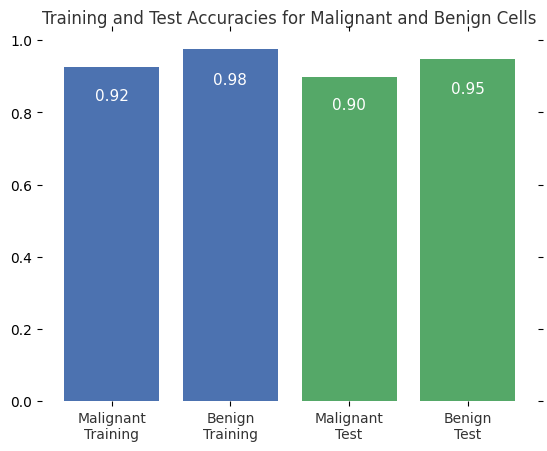

In [63]:
accuracy_plot()

### Question 10
1. Load Iris dataset from sklearn.
2. Split the data into training and testing (30% testing), use random_state 100
3. Create scatter plot matrix using the Seaborn library.
4. Choose two features only to train a knn model with suitable "k".
    - You must choose the best two features --> i.e. you need to experiment!!
    - You must choose the best K --> i.e. you need to experiment!!
5. Evaluate your model performance and comment on your results.
    - Print testing and training accuracies
    - Plot a confusion matrix for the model on the test data
    - **Questions to answer**:
        - Do you think the model did well?
        - Suggest one way to improve the model results

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [65]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['target'], test_size=0.3, random_state=100)

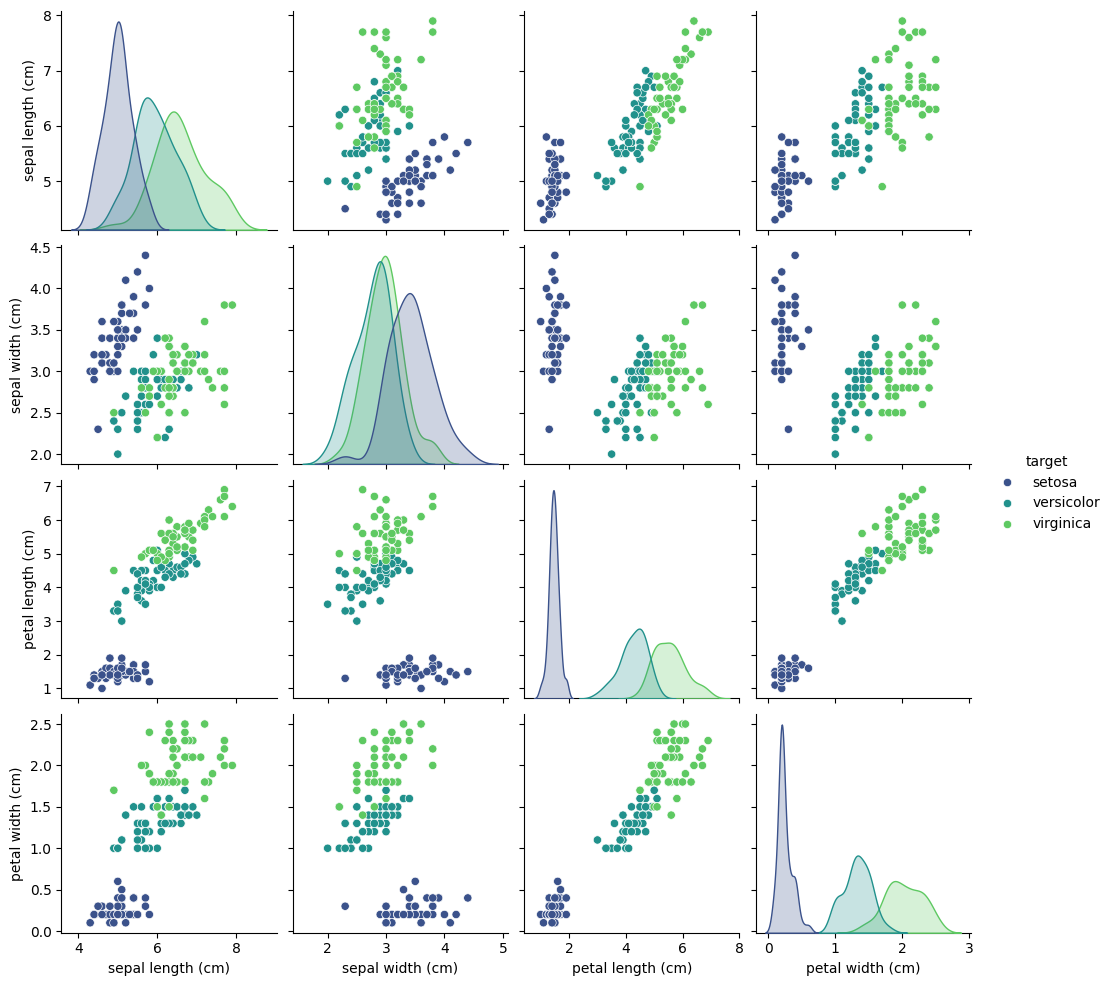

In [66]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Map target names to target values
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['target'] = iris_df['target'].map(target_names)

# Create scatter plot matrix
sns.pairplot(iris_df, hue='target', palette='viridis')
plt.show()

In [67]:
selected_features = ['petal width (cm)', 'petal length (cm)']

In [68]:
knn_classifier = KNeighborsClassifier(n_neighbors=6)


In [69]:
knn_classifier.fit(X_train[selected_features], y_train)

KNeighborsClassifier(n_neighbors=6)

In [70]:
y_pred_train = knn_classifier.predict(X_train[selected_features])
y_pred_test = knn_classifier.predict(X_test[selected_features])

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(train_accuracy,test_accuracy)

0.9714285714285714 0.9555555555555556


**Answer**

1. _______________________

2. ____________________

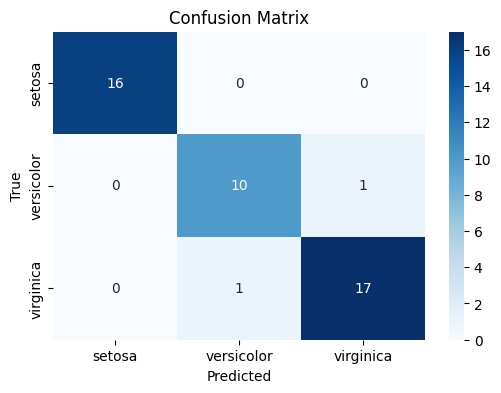

In [71]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
